## Import Libraries and Load Data

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
from sklearn import preprocessing
from sklearn.cluster import KMeans
import numpy as np

plt.style.use('ggplot')
plt.figure(figsize=(10,8))

<Figure size 720x576 with 0 Axes>

<Figure size 720x576 with 0 Axes>

In [2]:
seed_data = pd.read_csv('Seed_Data.csv')
df = seed_data

In [3]:
seed_data.head(2)

,A,P,C,LK,WK,A_Coef,LKG,target
0,15.26,14.84,0.8710,5.763,3.312,2.221,5.220,0
1,14.88,14.57,0.8811,5.554,3.333,1.018,4.956,0


## Checking Null Values

In [4]:
seed_data.isnull().sum()

A         0
P         0
C         0
LK        0
WK        0
A_Coef    0
LKG       0
target    0
dtype: int64

## Checking Correlation

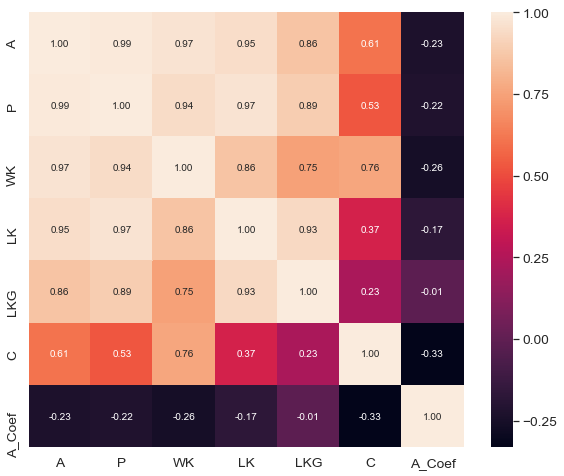

In [5]:
plt.figure(figsize=(10,8))
corrmat = seed_data.corr()
k = 7 #number of variables for heatmap
cols = corrmat.nlargest(k, 'A')['A'].index
cm = np.corrcoef(seed_data[cols].values.T)
sns.set(font_scale=1.25)
hm = sns.heatmap(cm, cbar=True, annot=True, square=True, fmt='.2f', annot_kws={'size': 10}, yticklabels=cols.values, xticklabels=cols.values)
plt.show()

In [6]:
seed_data.drop(['P','WK','LK','LKG'],axis=1,inplace=True)

In [7]:
seed_data.head(2)

,A,C,A_Coef,target
0,15.26,0.8710,2.221,0
1,14.88,0.8811,1.018,0


## Checking Outliers

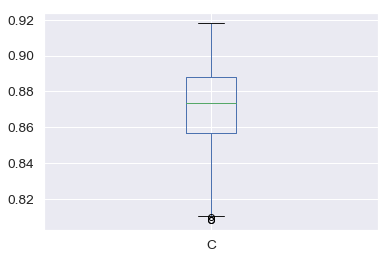

In [8]:
seed_data.C.plot(kind='box')

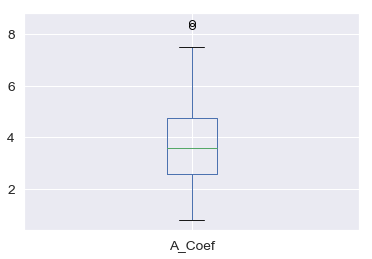

In [9]:
seed_data.A_Coef.plot(kind='box')

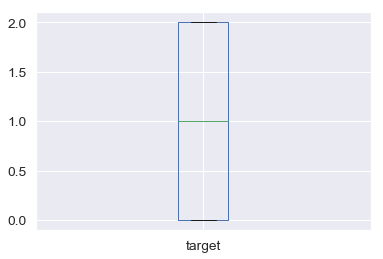

In [10]:
seed_data.target.plot(kind='box')

In [11]:
seed_data.describe()

,A,C,A_Coef,target
count,210.000000,210.000000,210.000000,210.000000
mean,14.847524,0.870999,3.700201,1.000000
std,2.909699,0.023629,1.503557,0.818448
min,10.590000,0.808100,0.765100,0.000000
25%,12.270000,0.856900,2.561500,0.000000
50%,14.355000,0.873450,3.599000,1.000000
75%,17.305000,0.887775,4.768750,2.000000
max,21.180000,0.918300,8.456000,2.000000


## Feature Scling

In [12]:
data = seed_data.iloc[:, 1:4].values  #standardize the data to normal distribution
dataset_standardized = preprocessing.scale(data)
dataset_standardized = pd.DataFrame(dataset_standardized)

## WSS Plot or Elbow Curve for Optimal Cluster Optimization

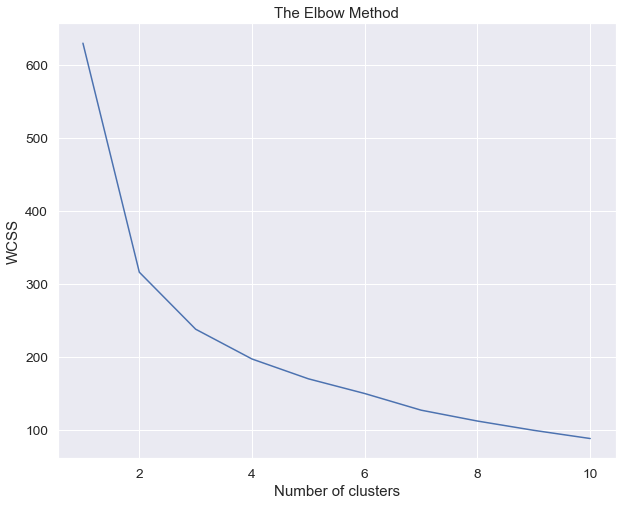

In [13]:
# find the appropriate cluster number
plt.figure(figsize=(10, 8))
wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters = i, init = 'k-means++', random_state = 42)
    kmeans.fit(dataset_standardized)
    wcss.append(kmeans.inertia_)
plt.plot(range(1, 11), wcss)
plt.title('The Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()

## K-Means Clustering and Cluster Information

In [14]:
# Fitting K-Means to the dataset

kmeans = KMeans(n_clusters = 3, init = 'k-means++', random_state = 42)
y_kmeans = kmeans.fit_predict(dataset_standardized)

#beginning of  the cluster numbering with 1 instead of 0

y_kmeans1=y_kmeans
y_kmeans1=y_kmeans+1

# New Dataframe called cluster

cluster = pd.DataFrame(y_kmeans1)

# Adding cluster to the Dataset1

seed_data['cluster'] = cluster

#Mean of clusters

kmeans_mean_cluster = pd.DataFrame(round(seed_data.groupby('cluster').mean(),1))
kmeans_mean_cluster

,A,C,A_Coef,target
cluster,,,,
1,17.4,0.9,4.1,1.0
2,11.9,0.8,4.9,2.0
3,15.1,0.9,2.4,0.2


In [15]:
# Fitting K-Means to the dataset

kmeans = KMeans(n_clusters = 2, init = 'k-means++', random_state = 42)
y_kmeans = kmeans.fit_predict(dataset_standardized)

#beginning of  the cluster numbering with 1 instead of 0

y_kmeans1=y_kmeans
y_kmeans1=y_kmeans+1

# New Dataframe called cluster

cluster = pd.DataFrame(y_kmeans1)

# Adding cluster to the Dataset1

df['cluster'] = cluster

#Mean of clusters

kmeans_mean_cluster = pd.DataFrame(round(seed_data.groupby('cluster').mean(),1))
kmeans_mean_cluster

,A,C,A_Coef,target
cluster,,,,
1,16.2,0.9,3.1,0.5
2,12.2,0.8,4.9,1.9


In [16]:
df.to_csv('Seed_Data_Predicted_Cluster.csv')